In [100]:
import os
import sys
import itertools as itt
from typing import List, Dict, Union, Tuple

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

sys.path.insert(0, os.path.join("..", ".."))
sys.path.insert(1, os.path.join(".."))

from infovar import DiscreteHandler
from infovar.stats.ranking import prob_higher

from infobs.plots import Plotter
from pdr_util import latex_line, latex_param, molecule, Settings, PDRGetter

Settings.only_rotational = True

plt.rc("text", usetex=True)

In [101]:
n_samples = 10_000
env = "horsehead"
obs_time = 0.75
seed = 0

getter_noisy = PDRGetter(
    n_samples,
    env,
    obs_time,
    noise=True,
    seed=seed
)

getter = PDRGetter(
    n_samples,
    env,
    obs_time,
    noise=False,
    seed=seed
)

In [102]:
envs = {
    "pdr1": {
        "Avmax": [3, 6]
    },
    "pdr2": {
        "Avmax": [6, 12]
    },
    "pdr3": {
        "Avmax": [12, 25]
    }
}

env_name = "pdr1"

In [103]:
getter.y_names

['P', 'radm', 'Avmax']

In [104]:
getter.x_names

['hcn_j1_f2__j0_f1',
 'hcop_j1__j0',
 'hnc_j1__j0',
 'cs_j2__j1',
 'c_18o_j1__j0',
 '13c_o_j1__j0',
 'cn_n1_j0d5__n0_j0d5',
 'cn_n1_j1d5__n0_j0d5',
 'co_v0_j1__v0_j0',
 'cs_j3__j2',
 'c2h_n2d0_j2d5_f3d0__n1d0_j1d5_f2d0',
 'hcn_j2_f3__j1_f2',
 'hcop_j2__j1',
 'c_18o_j2__j1',
 '13c_o_j2__j1',
 'cn_n2_j1d5__n1_j0d5',
 'cn_n2_j2d5__n1_j1d5',
 'co_v0_j2__v0_j1',
 'cs_j5__j4',
 'c2h_n3d0_j3d5_f4d0__n2d0_j2d5_f3d0',
 'c2h_n3d0_j2d5_f3d0__n2d0_j1d5_f2d0',
 'hcn_j3_f3__j2_f3',
 'hcop_j3__j2',
 'hnc_j3__j2',
 'cs_j6__j5',
 'c_18o_j3__j2',
 '13c_o_j3__j2',
 'cn_n3_j2d5__n2_j1d5',
 'cn_n3_j3d5__n2_j2d5',
 'cs_j7__j6',
 'co_v0_j3__v0_j2',
 'c2h_n4d0_j4d5_f5d0__n3d0_j3d5_f4d0',
 'c2h_n4d0_j3d5_f4d0__n3d0_j2d5_f3d0',
 'hcn_j4_f4__j3_f3',
 'hcop_j4__j3',
 'c_el3p_j1__el3p_j0',
 'c_el3p_j2__el3p_j1',
 'cp_el2p_j3_2__el2p_j1_2']

In [105]:
x_noisy, y_noisy = getter_noisy.get(
    getter_noisy.x_names, ["Avmax", "P", "radm"],
    restrictions=envs[env_name]
)
x, y = getter.get(
    getter.x_names, ["Avmax", "P", "radm"],
    restrictions=envs[env_name]
)

In [106]:
colors = ["tab:green" if molecule(l) in ["c", "cp"] else "tab:blue" for l in getter.x_names]

In [107]:
mean_snr = np.mean(x / np.abs(x - x_noisy), axis=0)

order = np.argsort(mean_snr)[::-1]

In [108]:
signal_rms = np.std(x, axis=0)
noise_rms = np.std(x - x_noisy, axis=0)
signal_mean_intensity = np.mean(x, axis=0)

In [109]:
figsize = (mean_snr.size/10*6.4, 4.8)
dpi = 150

labelsize = 24
labelpad = 10
linesize = 18
ticksize = 20
titlesize = 28
titlepad = 15

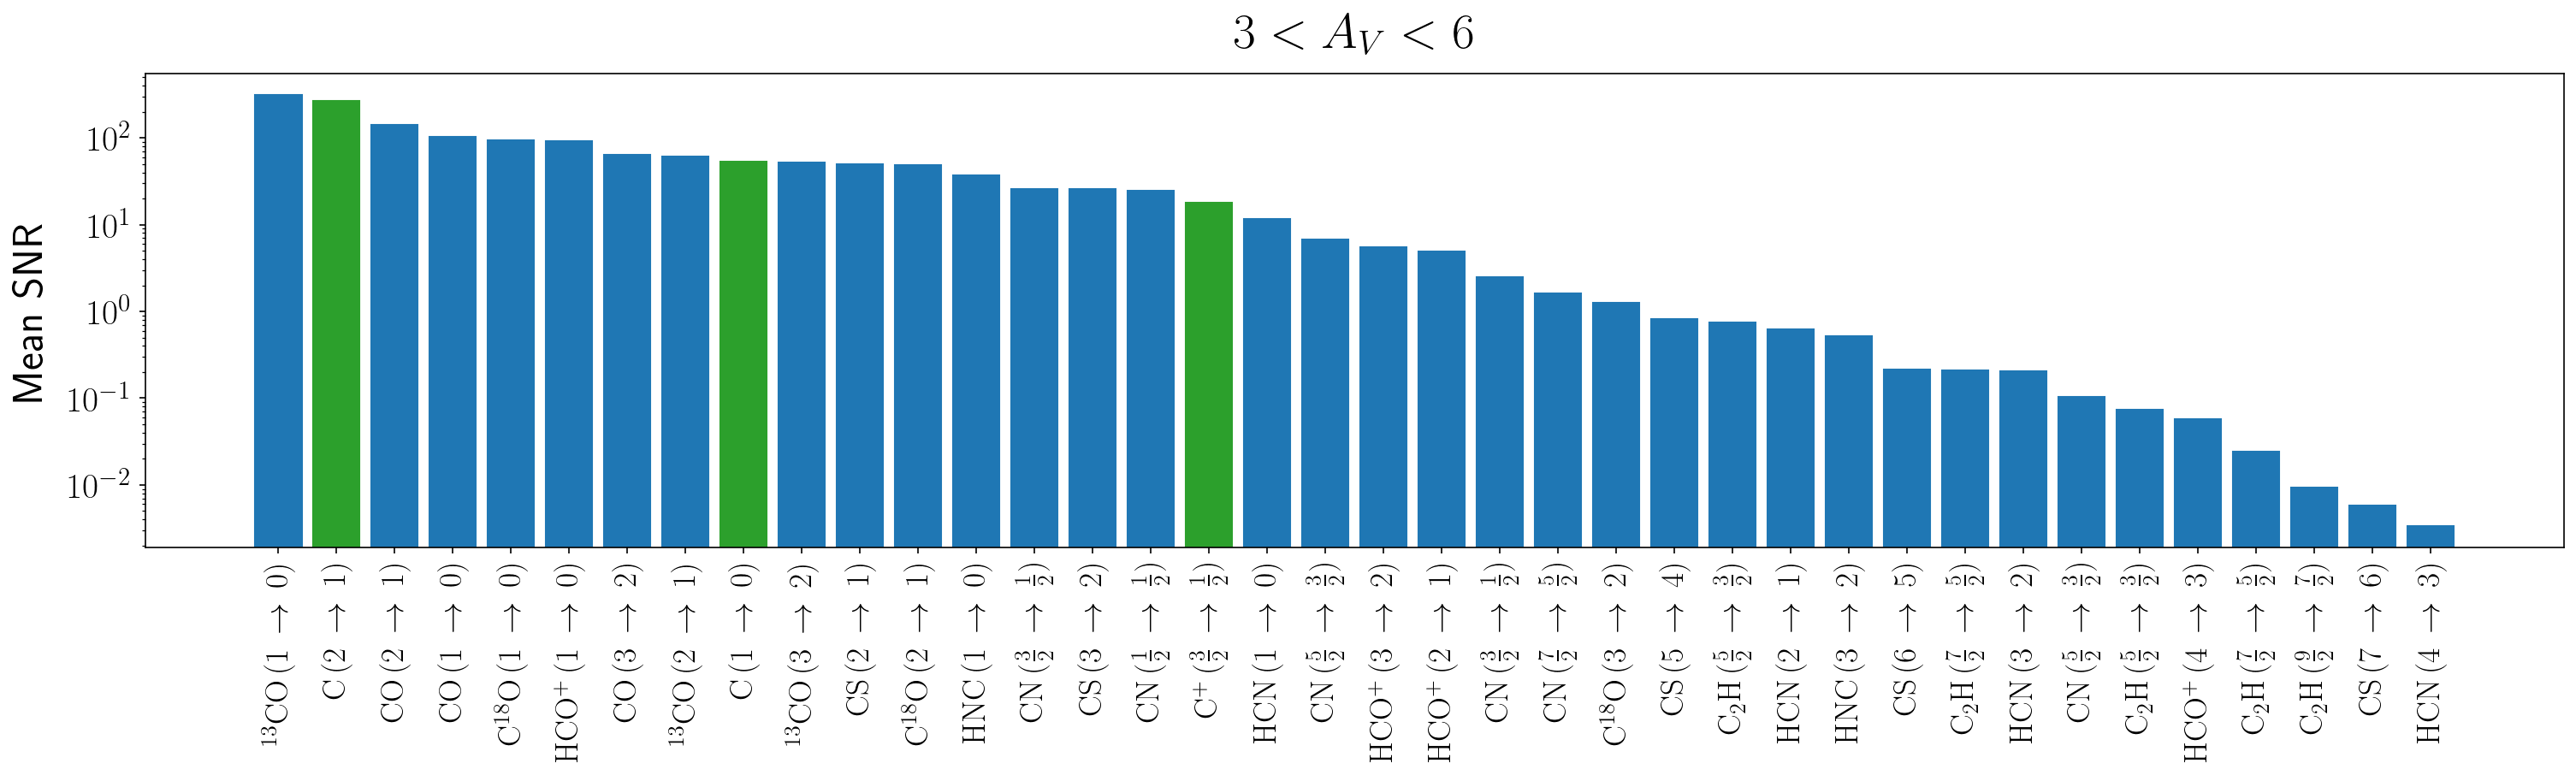

In [110]:
plt.figure(figsize=figsize, dpi=dpi)

barlist = plt.bar(np.arange(mean_snr.size), mean_snr[order])
for i, j in enumerate(order):
    barlist[i].set_color(colors[j])

plt.xticks(np.arange(mean_snr.size), ["$"+latex_line(getter.x_names[i])+"$" for i in order], rotation=90, fontsize=linesize)
plt.yticks(fontsize=ticksize)
plt.yscale("log")

plt.ylabel("Mean SNR", fontsize=labelsize, labelpad=labelpad)

param, (low, upp) = list(envs[env_name].items())[0]
plt.title(f"${low} < {latex_param(param)} < {upp}$", fontsize=titlesize, pad=titlepad)

plt.savefig(os.path.join("snrs", f"{env_name}_snr.png"), bbox_inches="tight")
plt.show()

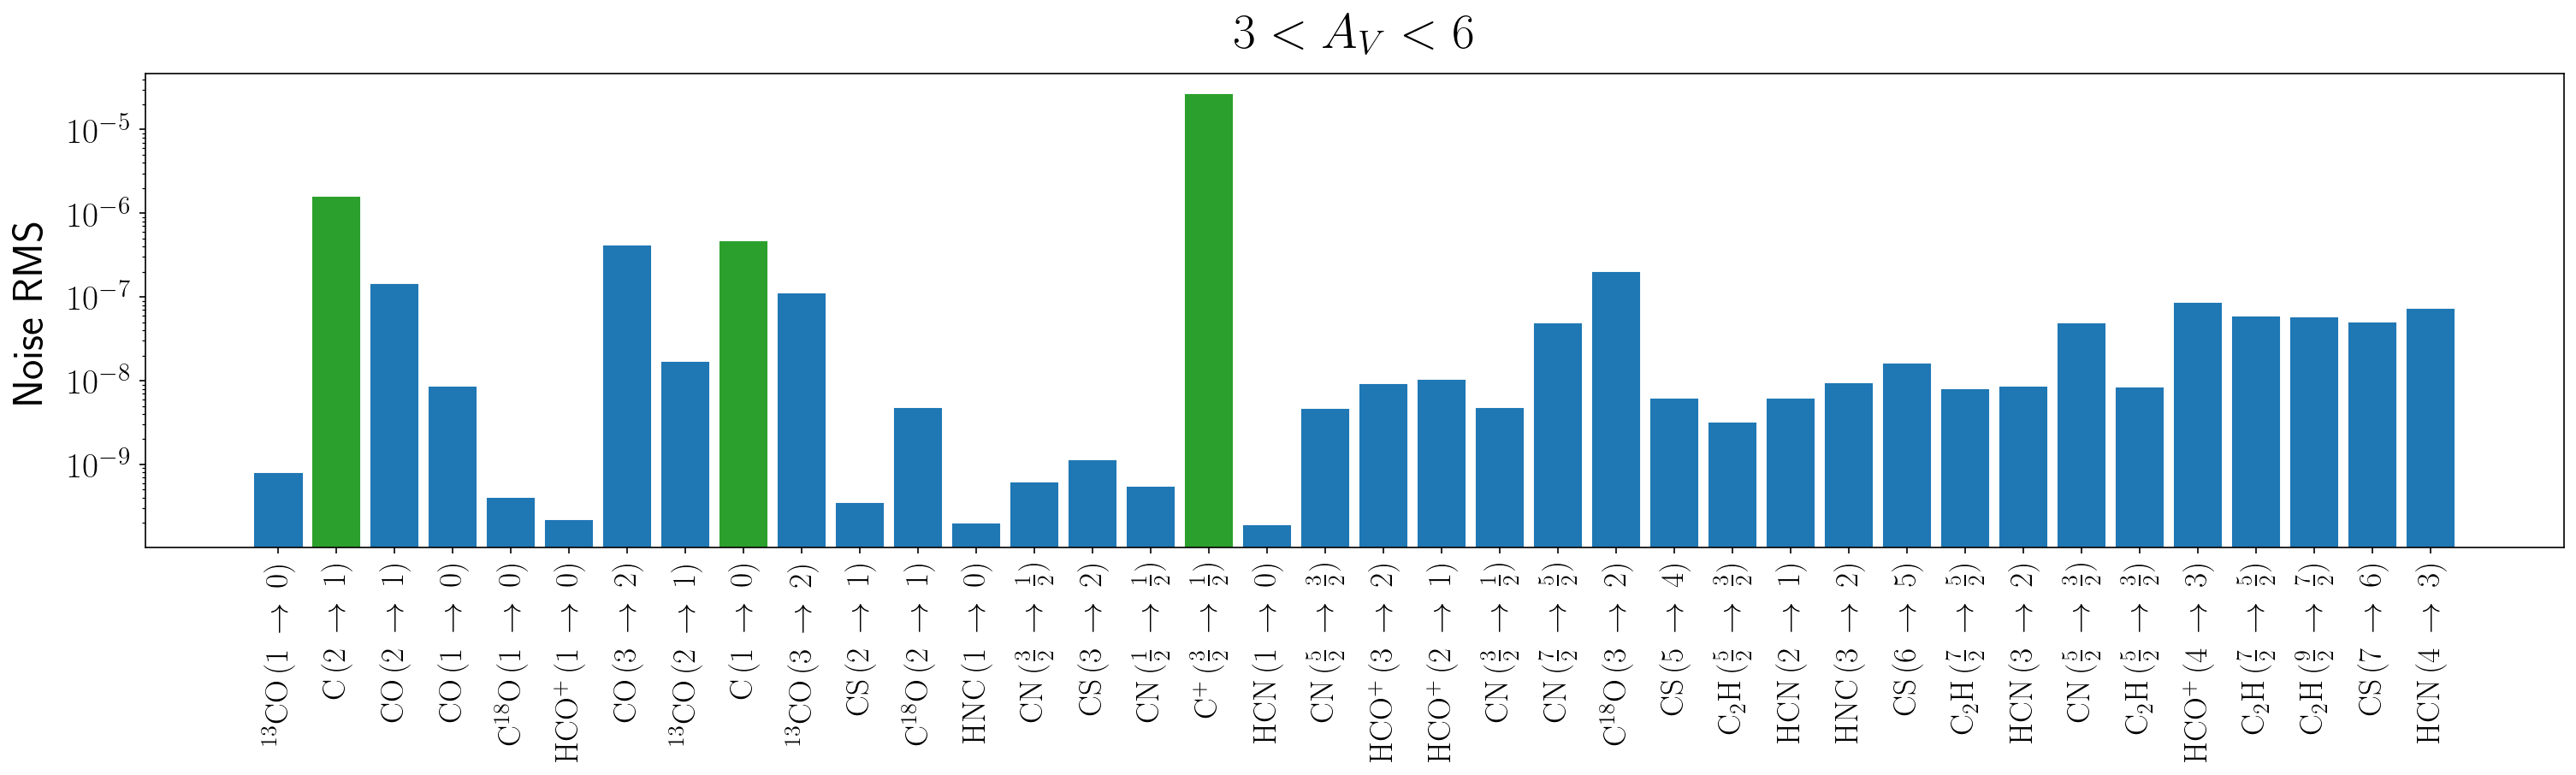

In [111]:
plt.figure(figsize=figsize, dpi=dpi)

barlist = plt.bar(np.arange(mean_snr.size), noise_rms[order])
for i, j in enumerate(order):
    barlist[i].set_color(colors[j])

plt.xticks(np.arange(mean_snr.size), ["$"+latex_line(getter.x_names[i])+"$" for i in order], rotation=90, fontsize=linesize)
plt.yticks(fontsize=ticksize)
plt.yscale("log")

plt.ylabel("Noise RMS", fontsize=labelsize, labelpad=labelpad)

param, (low, upp) = list(envs[env_name].items())[0]
plt.title(f"${low} < {latex_param(param)} < {upp}$", fontsize=titlesize, pad=titlepad)

plt.savefig(os.path.join("snrs", f"{env_name}_rms.png"), bbox_inches="tight")
plt.show()

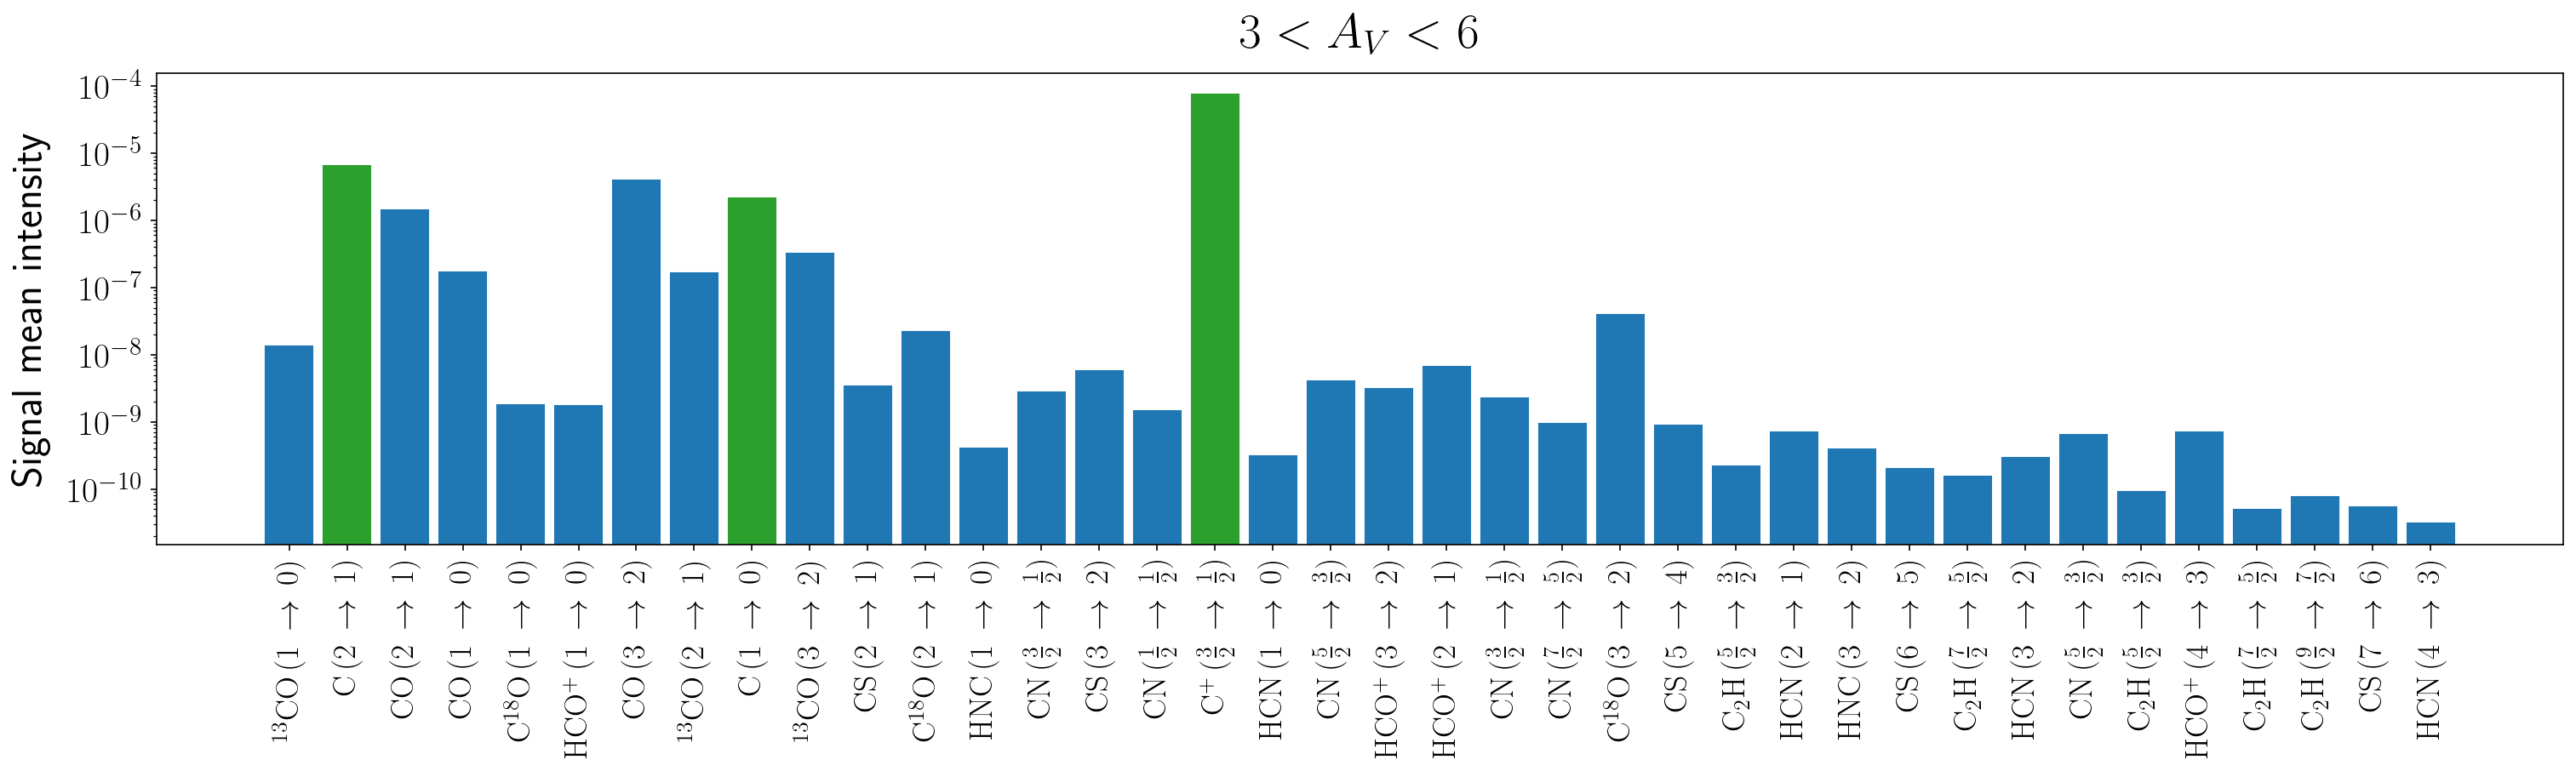

In [112]:
plt.figure(figsize=figsize, dpi=dpi)

barlist = plt.bar(np.arange(mean_snr.size), signal_mean_intensity[order])
for i, j in enumerate(order):
    barlist[i].set_color(colors[j])

plt.xticks(np.arange(mean_snr.size), ["$"+latex_line(getter.x_names[i])+"$" for i in order], rotation=90, fontsize=linesize)
plt.yticks(fontsize=ticksize)
plt.yscale("log")

plt.ylabel("Signal mean intensity", fontsize=labelsize, labelpad=labelpad)

param, (low, upp) = list(envs[env_name].items())[0]
plt.title(f"${low} < {latex_param(param)} < {upp}$", fontsize=titlesize, pad=titlepad)

plt.savefig(os.path.join("snrs", f"{env_name}_mean.png"), bbox_inches="tight")
plt.show()

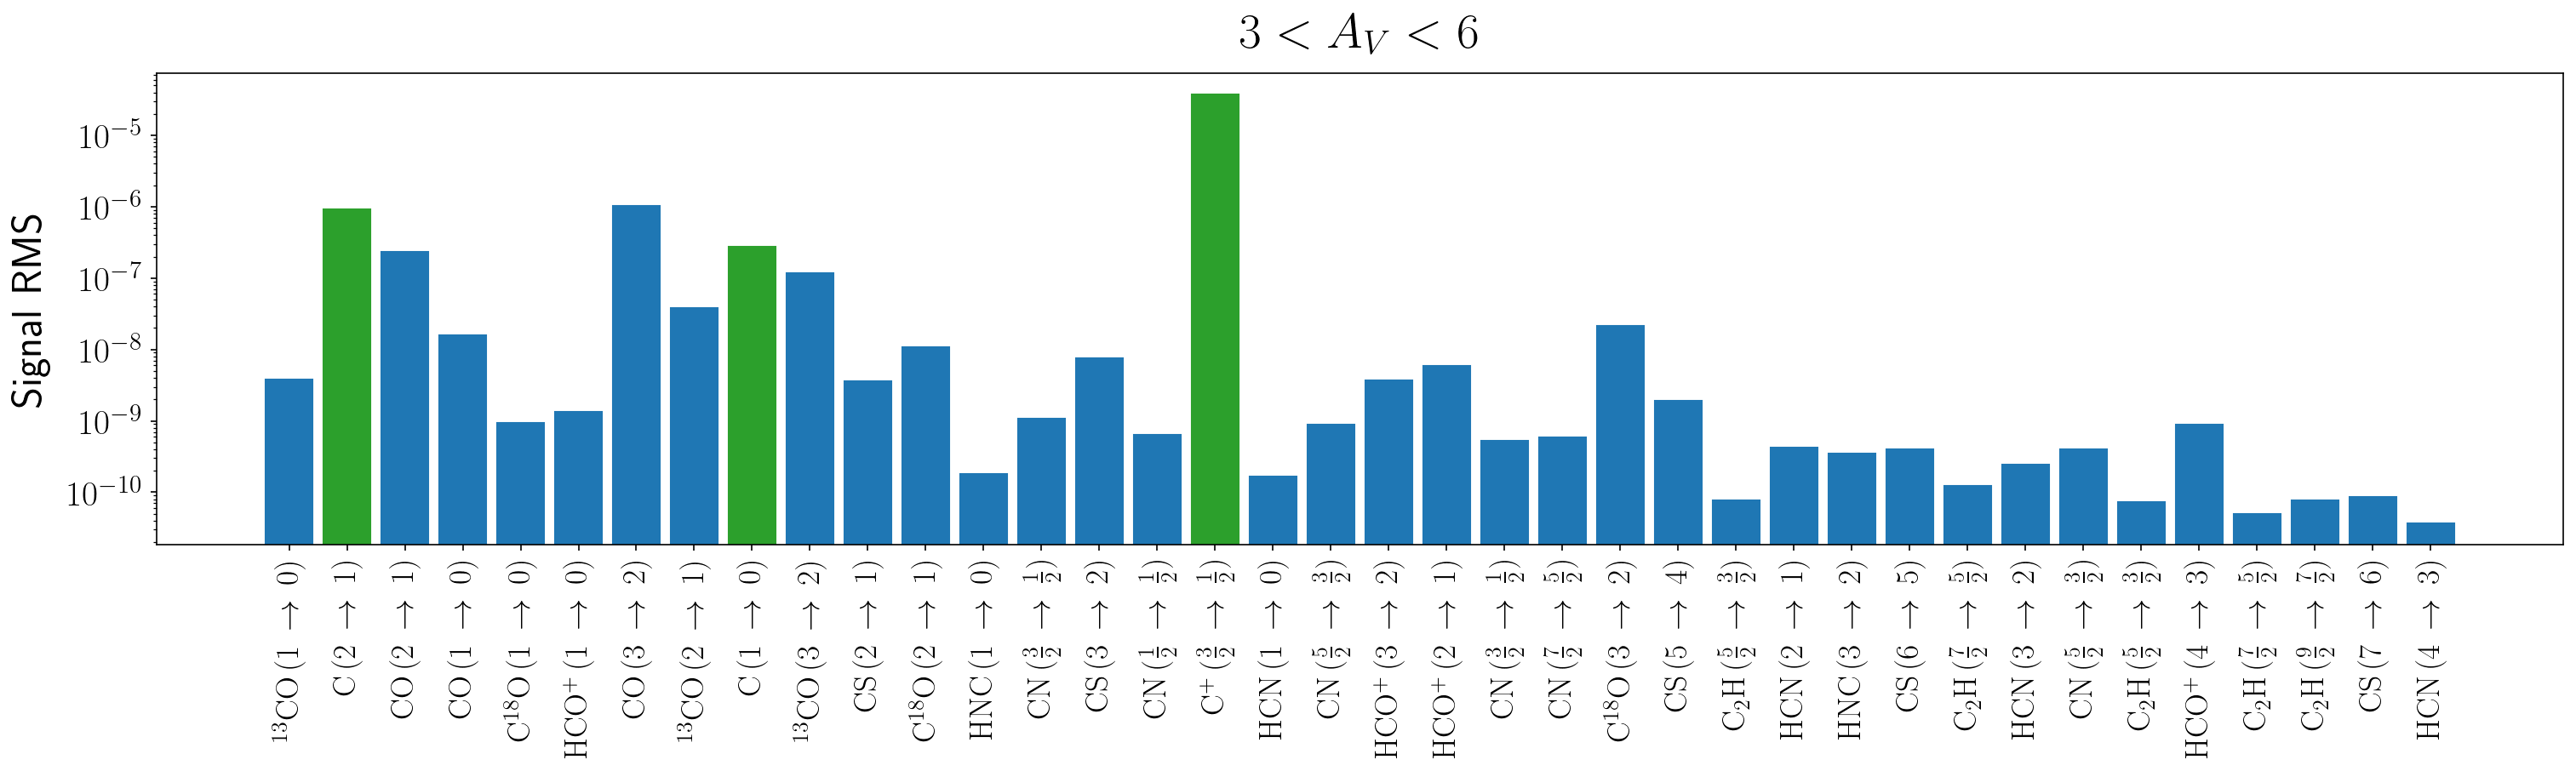

In [113]:
plt.figure(figsize=figsize, dpi=dpi)

barlist = plt.bar(np.arange(mean_snr.size), signal_rms[order])
for i, j in enumerate(order):
    barlist[i].set_color(colors[j])

plt.xticks(np.arange(mean_snr.size), ["$"+latex_line(getter.x_names[i])+"$" for i in order], rotation=90, fontsize=linesize)
plt.yticks(fontsize=ticksize)
plt.yscale("log")

plt.ylabel("Signal RMS", fontsize=labelsize, labelpad=labelpad)

param, (low, upp) = list(envs[env_name].items())[0]
plt.title(f"${low} < {latex_param(param)} < {upp}$", fontsize=titlesize, pad=titlepad)

plt.savefig(os.path.join("snrs", f"{env_name}_sig_rms.png"), bbox_inches="tight")
plt.show()

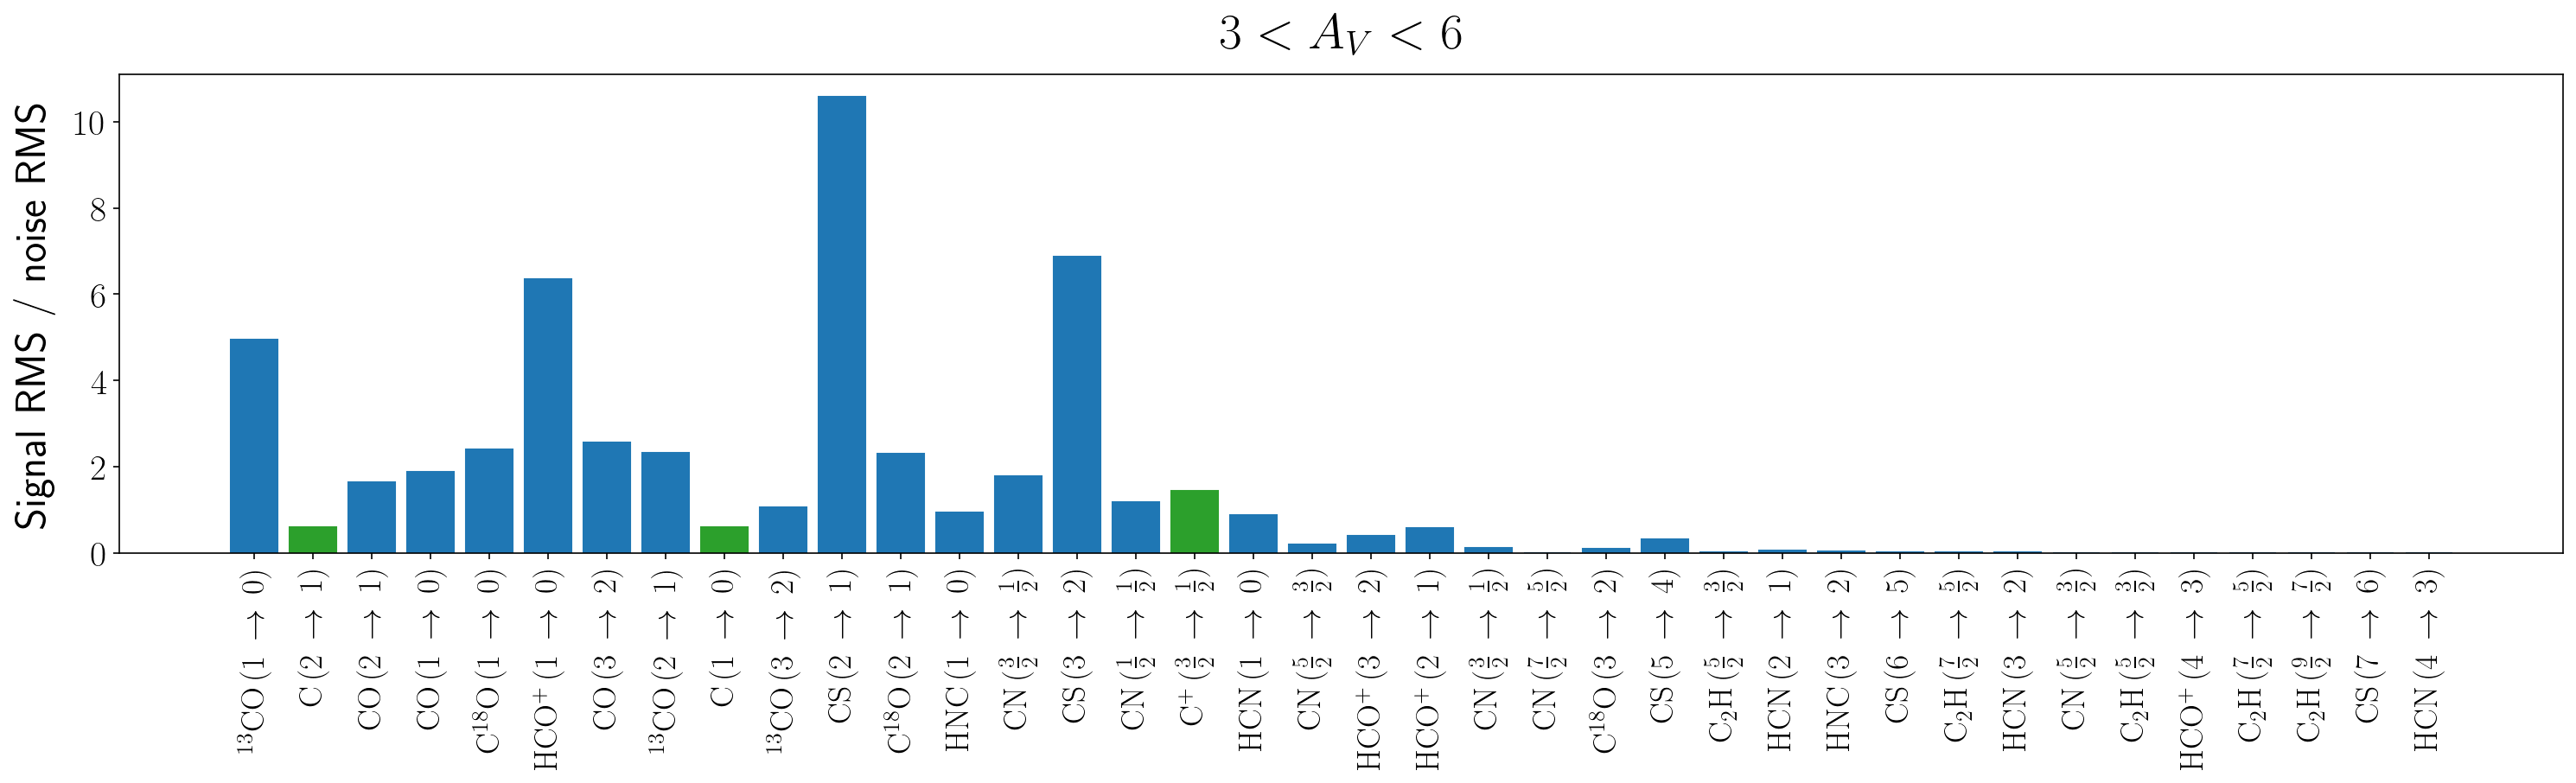

In [114]:
ratio = signal_rms/noise_rms

plt.figure(figsize=figsize, dpi=dpi)

barlist = plt.bar(np.arange(mean_snr.size), ratio[order])
for i, j in enumerate(order):
    barlist[i].set_color(colors[j])

plt.xticks(np.arange(mean_snr.size), ["$"+latex_line(getter.x_names[i])+"$" for i in order], rotation=90, fontsize=linesize)
plt.yticks(fontsize=ticksize)
# plt.yscale("log")

plt.ylabel("Signal RMS / noise RMS", fontsize=labelsize, labelpad=labelpad)

param, (low, upp) = list(envs[env_name].items())[0]
plt.title(f"${low} < {latex_param(param)} < {upp}$", fontsize=titlesize, pad=titlepad)

plt.savefig(os.path.join("snrs", f"{env_name}_rms_over_rms.png"), bbox_inches="tight")
plt.show()

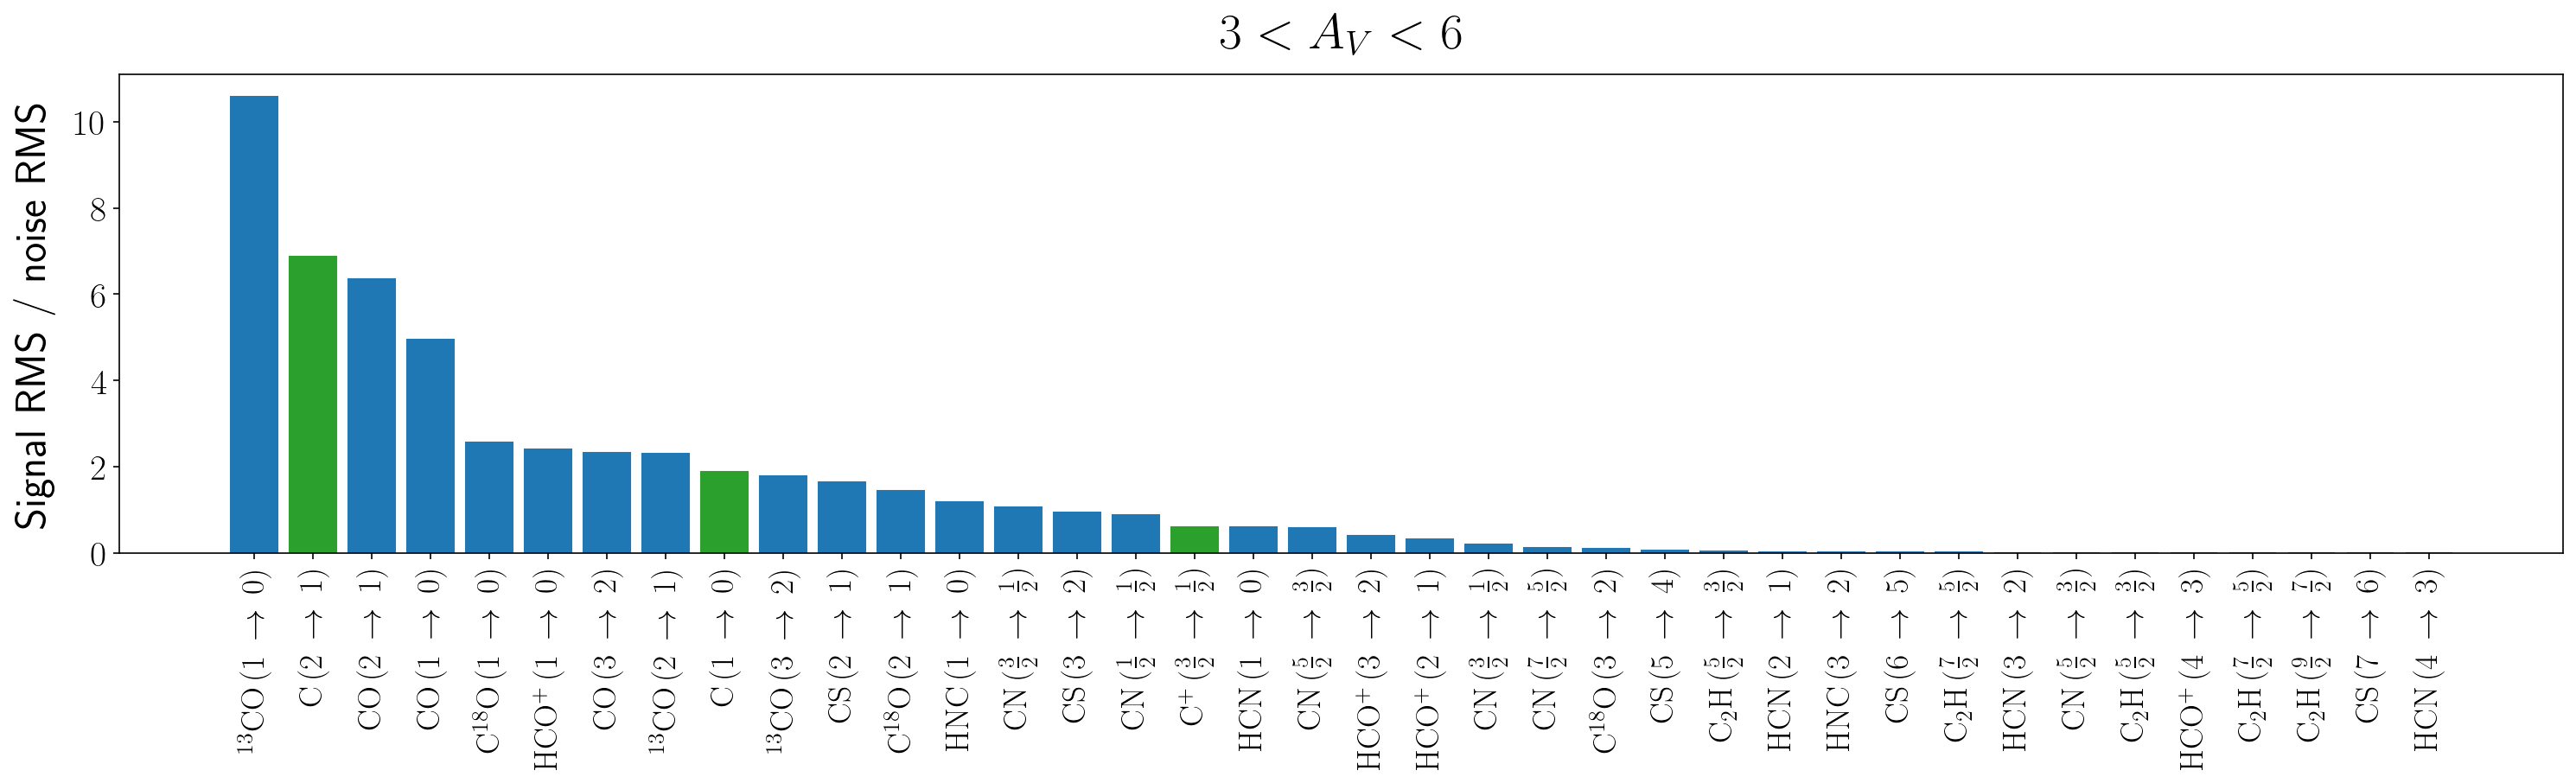

In [115]:
order_ratio = np.argsort(ratio)[::-1]

plt.figure(figsize=figsize, dpi=dpi)

barlist = plt.bar(np.arange(mean_snr.size), ratio[order_ratio])
for i, j in enumerate(order):
    barlist[i].set_color(colors[j])

plt.xticks(np.arange(mean_snr.size), ["$"+latex_line(getter.x_names[i])+"$" for i in order], rotation=90, fontsize=linesize)
plt.yticks(fontsize=ticksize)
# plt.yscale("log")

plt.ylabel("Signal RMS / noise RMS", fontsize=labelsize, labelpad=labelpad)

param, (low, upp) = list(envs[env_name].items())[0]
plt.title(f"${low} < {latex_param(param)} < {upp}$", fontsize=titlesize, pad=titlepad)

plt.savefig(os.path.join("snrs", f"{env_name}_rms_over_rms_ordered.png"), bbox_inches="tight")
plt.show()